In [58]:
import pandas as pd 
import numpy as np 
import os
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")

In [36]:
df = pd.read_csv('data/heartt.csv')

In [37]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [38]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [39]:
df.shape

(1025, 14)

In [40]:
df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [41]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [42]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

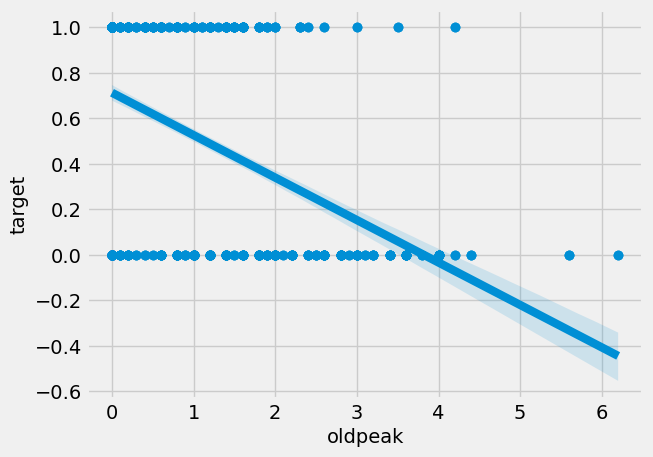

In [43]:
sns.regplot(x = df['oldpeak'],y = df['target'])
plt.show()

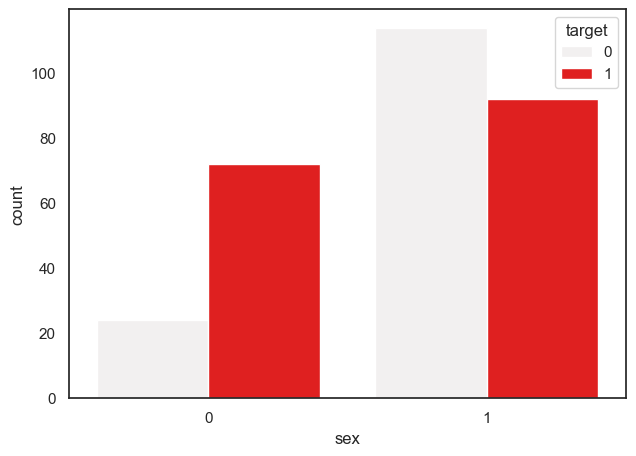

In [130]:
sns.countplot(x = 'sex', hue ='target' ,color='red', data = df)
plt.ylim(0,)
plt.show()

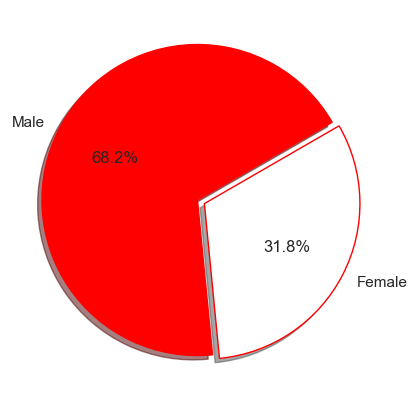

In [171]:
vals = df['sex'].value_counts().values.tolist()
labs = ['Male','Female']
color = ['red','white']
plt.pie(vals,labels = labs ,colors=color  , wedgeprops={'edgecolor':'red'} , explode=[.05,0],
        shadow=True,autopct = "%1.1f%%",startangle=30)
plt.show()

In [45]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool

In [48]:
df.drop_duplicates(inplace=True)

In [49]:
df.shape

(302, 14)

In [50]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


In [51]:
df.corr()['target'].sort_values(ascending=False)

target      1.000000
cp          0.432080
thalach     0.419955
slope       0.343940
restecg     0.134874
fbs        -0.026826
chol       -0.081437
trestbps   -0.146269
age        -0.221476
sex        -0.283609
thal       -0.343101
ca         -0.408992
oldpeak    -0.429146
exang      -0.435601
Name: target, dtype: float64

In [52]:
df.drop(['fbs','chol','trestbps'],axis=1,inplace=True)

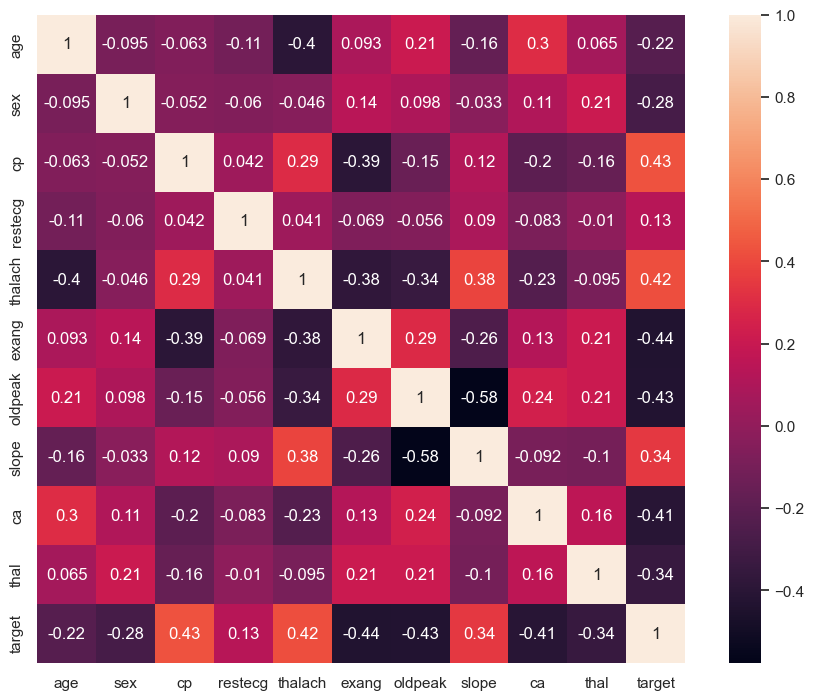

In [69]:
plt.figure(figsize=(10,8))
sns.set_context("notebook")
sns.set( style = "white" )   
sns.heatmap(df.corr(), annot = True , square=True )
plt.show()

In [73]:
features = df.iloc[:,:-1].columns.tolist()
features

['age',
 'sex',
 'cp',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [74]:
X  = df[features]
Y = df['target']

In [87]:
Input = [('scale',StandardScaler()),('model_log',LogisticRegression())]

In [88]:
pipe = Pipeline(Input)

In [89]:
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('model_log', LogisticRegression())])

In [90]:
# split the data 
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=.1,random_state=42)

In [91]:
x_train.shape

(271, 10)

In [93]:
pipe.fit(x_train,y_train)
pipe.score(x_train,y_train)

0.8745387453874539

In [94]:
pipe.score(x_test,y_test)

0.7419354838709677

In [95]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [96]:
log_pred = pipe.predict(x_test)

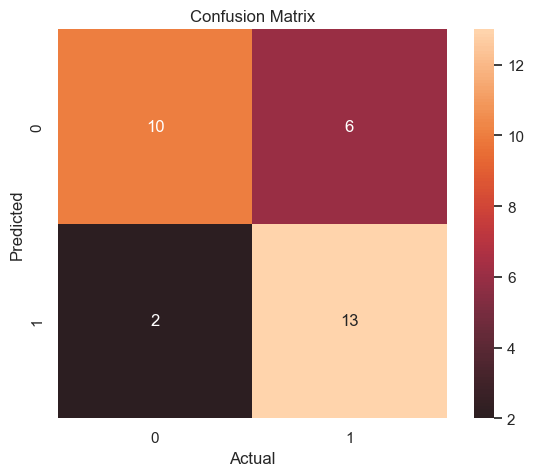

In [97]:
conf = confusion_matrix(y_test,log_pred)
sns.heatmap(conf,annot=True,square = True,center=True)
plt.title('Confusion Matrix')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

In [98]:
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.83      0.62      0.71        16
           1       0.68      0.87      0.76        15

    accuracy                           0.74        31
   macro avg       0.76      0.75      0.74        31
weighted avg       0.76      0.74      0.74        31



## Decision Tree

In [100]:
Input2 = [('scale',StandardScaler()),('model_tree',DecisionTreeClassifier())]
pipe2 = Pipeline(Input2)

In [101]:
pipe2.fit(x_train,y_train)
pipe2.score(x_train,y_train)

1.0

In [104]:
pipe2.score(x_test,y_test)

0.7741935483870968

In [102]:
tree_pred = pipe2.predict(x_test)

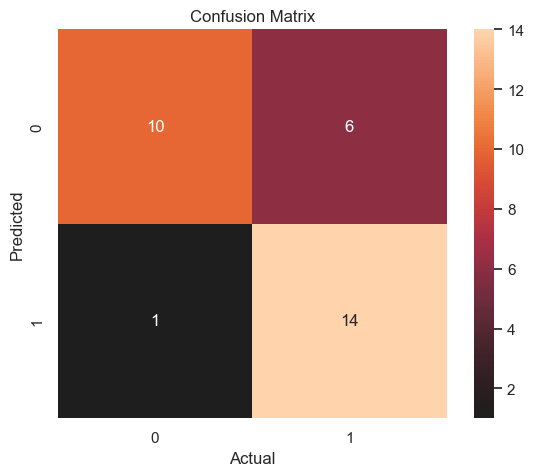

In [103]:
conf = confusion_matrix(y_test,tree_pred)
sns.heatmap(conf,annot=True,square = True,center=True)
plt.title('Confusion Matrix')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

## Naive Bayes

In [108]:
Input4 = [('scale',StandardScaler()),('model_tree',GaussianNB())]
pipe4 = Pipeline(Input4)

In [109]:
pipe4.fit(x_train,y_train)
pipe4.score(x_train,y_train)

0.8413284132841329

In [110]:
pipe4.score(x_test,y_test)

0.8064516129032258

In [111]:
gauss_pred = pipe4.predict(x_test)

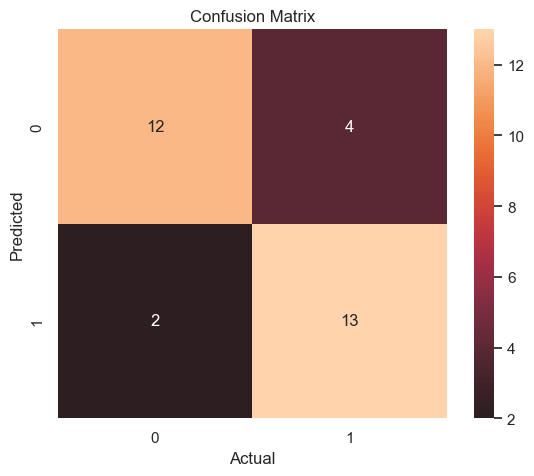

In [112]:
conf = confusion_matrix(y_test,gauss_pred)
sns.heatmap(conf,annot=True,square = True,center=True)
plt.title('Confusion Matrix')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()